In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [18]:
pd.set_option("max_rows", 25)

In [19]:
# Apply the default theme
sns.set_theme()
sns.set_style("whitegrid")

In [20]:
data_path = '/home/achara/data/achara/'
df = pd.read_csv(data_path + 'pc_data_2017_to_2019_2.csv')

In [21]:
df.columns

Index(['DateTime', 'SensorDepth_Water_EXO', 'PC_Water_EXO', 'Chla_Water_EXO',
       'DO_Water_EXO', 'DO-Sat_Water_EXO', 'SpCond_Water_EXO',
       'Temperature_Water_EXO', 'pH_Water_EXO', 'rel_fl', 'month', 'day',
       'year', 'SolarRad_Air_LiCor', 'TP', 'TSP', 'SRP', 'TN', 'NO3', 'NH4',
       'PP', 'PRECTOTCORR', 'ALLSKY_SFC_SW_DWN', 'ALLSKY_SFC_LW_DWN'],
      dtype='object')

## Feature scaling

In [22]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
ms = MinMaxScaler()

In [24]:
c=df.columns[df.columns!='DateTime'].values
cols = list(c)
print(cols)

['SensorDepth_Water_EXO', 'PC_Water_EXO', 'Chla_Water_EXO', 'DO_Water_EXO', 'DO-Sat_Water_EXO', 'SpCond_Water_EXO', 'Temperature_Water_EXO', 'pH_Water_EXO', 'rel_fl', 'month', 'day', 'year', 'SolarRad_Air_LiCor', 'TP', 'TSP', 'SRP', 'TN', 'NO3', 'NH4', 'PP', 'PRECTOTCORR', 'ALLSKY_SFC_SW_DWN', 'ALLSKY_SFC_LW_DWN']


In [25]:
X=df[cols]

Y=df[['PC_Water_EXO']]

In [26]:
X = ms.fit_transform(X)
X = pd.DataFrame(X, columns=[cols])

In [27]:
X.head()

SensorDepth_Water_EXO PC_Water_EXO Chla_Water_EXO DO_Water_EXO  \
0              0.017306     0.165341       0.029115     0.606145   
1              0.017695     0.162867       0.040962     0.607076   
2              0.018084     0.148021       0.059983     0.605214   
3              0.018473     0.167816       0.066091     0.605214   
4              0.018862     0.150495       0.057054     0.604283   

  DO-Sat_Water_EXO SpCond_Water_EXO Temperature_Water_EXO pH_Water_EXO  \
0         0.748075         0.113477              0.717584     0.803487   
1         0.749657         0.113021              0.717880     0.812303   
2         0.744468         0.110547              0.710480     0.808533   
3         0.747885         0.112891              0.718917     0.818426   
4         0.746936         0.112305              0.719361     0.810754   

     rel_fl     month  ...        TP  TSP  SRP        TN      NO3  \
0  0.146619  0.714286  ...  0.600322  1.0  1.0  0.648905  0.19007   
1  0.143080  0.714286  ...  0.600322  1.0  1.0  0.648905  0.19007   
2  0.139541  0.714286  ...  0.600322  1.0  1.0  0.648905  0.19007   
3  0.136002  0.714286  ...  0.600322  1.0  1.0  0.648905  0.19007   
4  0.137772  0.714286  ...  0.600322  1.0  1.0  0.648905  0.19007   

            NH4        PP PRECTOTCORR ALLSKY_SFC_SW_DWN ALLSKY_SFC_LW_DWN  
0  1.665335e-16  0.478222     0.08807           0.24902           0.57882  
1  1.665335e-16  0.478222     0.08807           0.24902           0.57882  
2  1.665335e-16  0.478222     0.08807           0.24902           0.57882  
3  1.665335e-16  0.478222     0.08807           0.24902           0.57882  
4  1.665335e-16  0.478222     0.08807           0.24902           0.57882  

[5 rows x 23 columns]

## K-means

In [28]:
from sklearn.cluster import KMeans

In [29]:
def cluster(n:int):
       kmeans = KMeans(n_clusters=n, random_state=0)
       kmeans.fit(X)
       y_kmeans = kmeans.predict(X)
       inertia = kmeans.inertia_
       return y_kmeans, inertia

In [30]:
sse = []
for k in range(2,10):
       y_kmeans, inertia = cluster(k)
       sse.append(inertia)

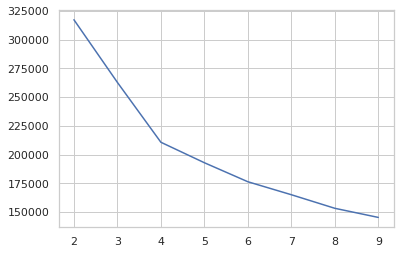

In [31]:
sns.lineplot(x=range(2,10), y=sse)
#plt.plot(range(2,20), sse, scalex=20)
plt.show()

### Conclusion:

The optimal number of clusters is 4

In [32]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X)

KMeans(n_clusters=4, random_state=0)

In [33]:
centers = pd.DataFrame(kmeans.cluster_centers_, columns=cols)

In [34]:
centers

SensorDepth_Water_EXO  PC_Water_EXO  Chla_Water_EXO  DO_Water_EXO  \
0               0.400730      0.240104        0.150967      0.761222   
1               0.445231      0.341620        0.111187      0.802232   
2               0.423950      0.253062        0.102154      0.611166   
3               0.439735      0.321115        0.103240      0.691869   

   DO-Sat_Water_EXO  SpCond_Water_EXO  Temperature_Water_EXO  pH_Water_EXO  \
0          0.727661          0.160935               0.312140      0.511111   
1          0.731376          0.158716               0.256477      0.537776   
2          0.582534          0.141670               0.307112      0.500691   
3          0.673163          0.169400               0.338471      0.487426   

     rel_fl     month  ...        TP       TSP       SRP        TN       NO3  \
0  0.222152  0.279786  ...  0.140972  0.538430  0.802731  0.678715  0.662088   
1  0.394848  0.142857  ...  1.000000  0.521351  0.309222  0.819458  0.071383   
2  0.268763  0.746307  ...  0.321665  0.387574  0.459882  0.602751  0.339025   
3  0.386625  0.365484  ...  0.093537  0.438180  0.637432  0.570262  0.491220   

        NH4        PP  PRECTOTCORR  ALLSKY_SFC_SW_DWN  ALLSKY_SFC_LW_DWN  
0  0.056977  0.067866     0.055689           0.631932           0.761695  
1  1.000000  1.000000     0.079714           0.674867           0.726630  
2  0.155344  0.291495     0.076134           0.245555           0.556339  
3  0.049112  0.035331     0.055979           0.617612           0.760002  

[4 rows x 23 columns]

In [35]:
centers.columns

Index(['SensorDepth_Water_EXO', 'PC_Water_EXO', 'Chla_Water_EXO',
       'DO_Water_EXO', 'DO-Sat_Water_EXO', 'SpCond_Water_EXO',
       'Temperature_Water_EXO', 'pH_Water_EXO', 'rel_fl', 'month', 'day',
       'year', 'SolarRad_Air_LiCor', 'TP', 'TSP', 'SRP', 'TN', 'NO3', 'NH4',
       'PP', 'PRECTOTCORR', 'ALLSKY_SFC_SW_DWN', 'ALLSKY_SFC_LW_DWN'],
      dtype='object')

In [36]:
kmeans.cluster_centers_

array([[0.40072994, 0.24010428, 0.15096686, 0.76122205, 0.7276613 ,
        0.16093503, 0.31213956, 0.51111106, 0.22215213, 0.27978637,
        0.50036043, 0.20287373, 0.8878496 , 0.14097227, 0.53842986,
        0.8027314 , 0.67871549, 0.66208826, 0.05697741, 0.06786637,
        0.05568928, 0.63193192, 0.76169482],
       [0.44523131, 0.34162022, 0.11118666, 0.80223172, 0.7313755 ,
        0.15871555, 0.25647695, 0.53777645, 0.39484844, 0.14285714,
        0.54867752, 1.        , 0.9055271 , 1.        , 0.52135092,
        0.30922155, 0.8194583 , 0.07138312, 1.        , 1.        ,
        0.07971353, 0.67486669, 0.72663001],
       [0.42395   , 0.25306227, 0.10215406, 0.61116589, 0.58253439,
        0.14166969, 0.3071117 , 0.50069056, 0.2687625 , 0.74630672,
        0.45802513, 0.41720431, 0.2397566 , 0.32166508, 0.38757436,
        0.45988247, 0.60275128, 0.33902454, 0.15534375, 0.29149505,
        0.07613399, 0.2455548 , 0.55633862],
       [0.43973509, 0.32111507, 0.10323998, 0.691

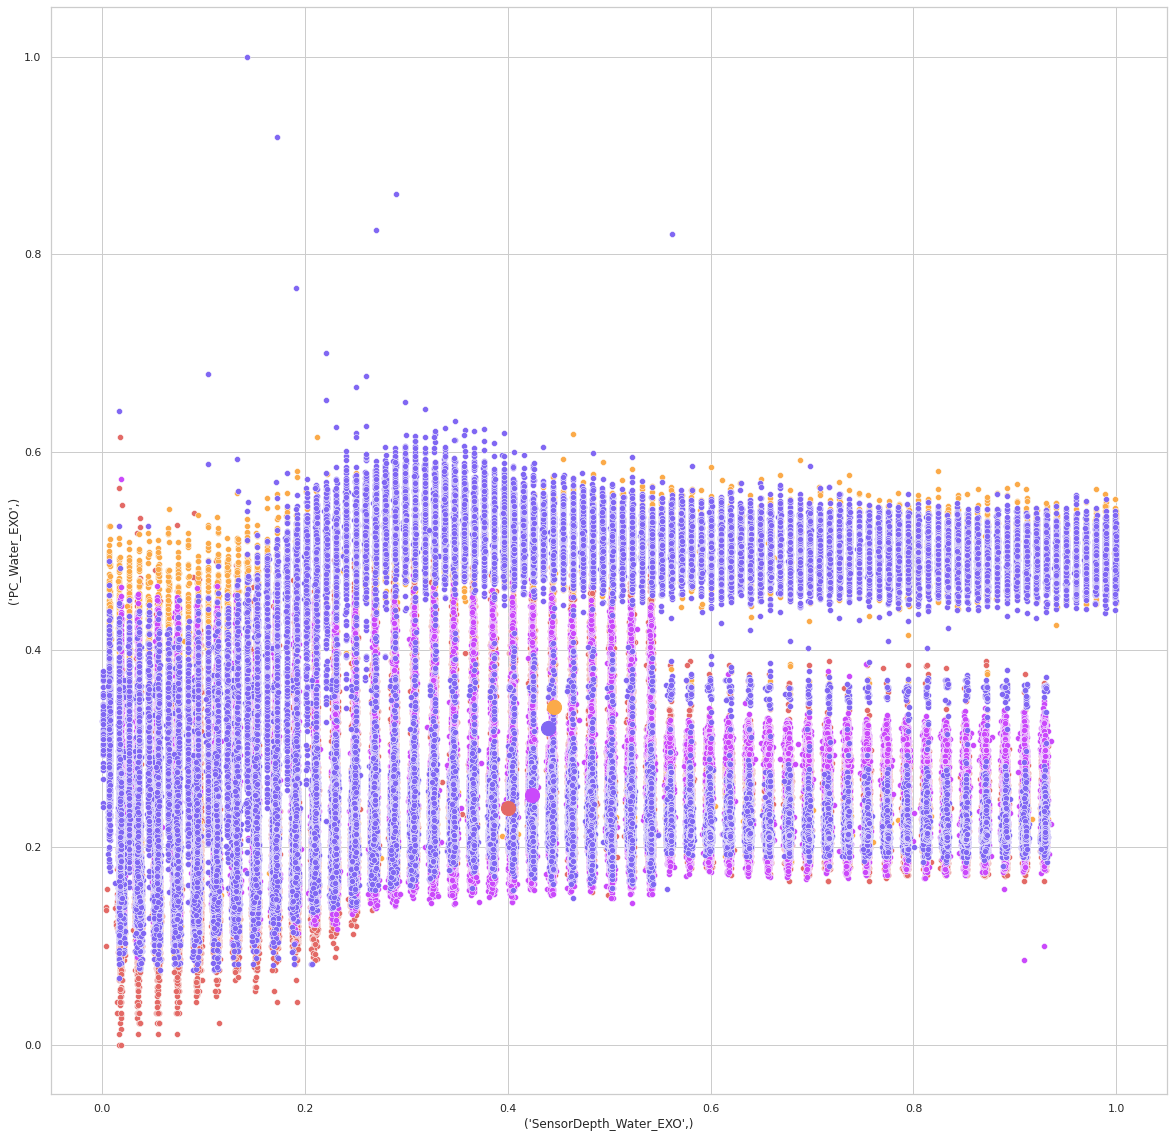

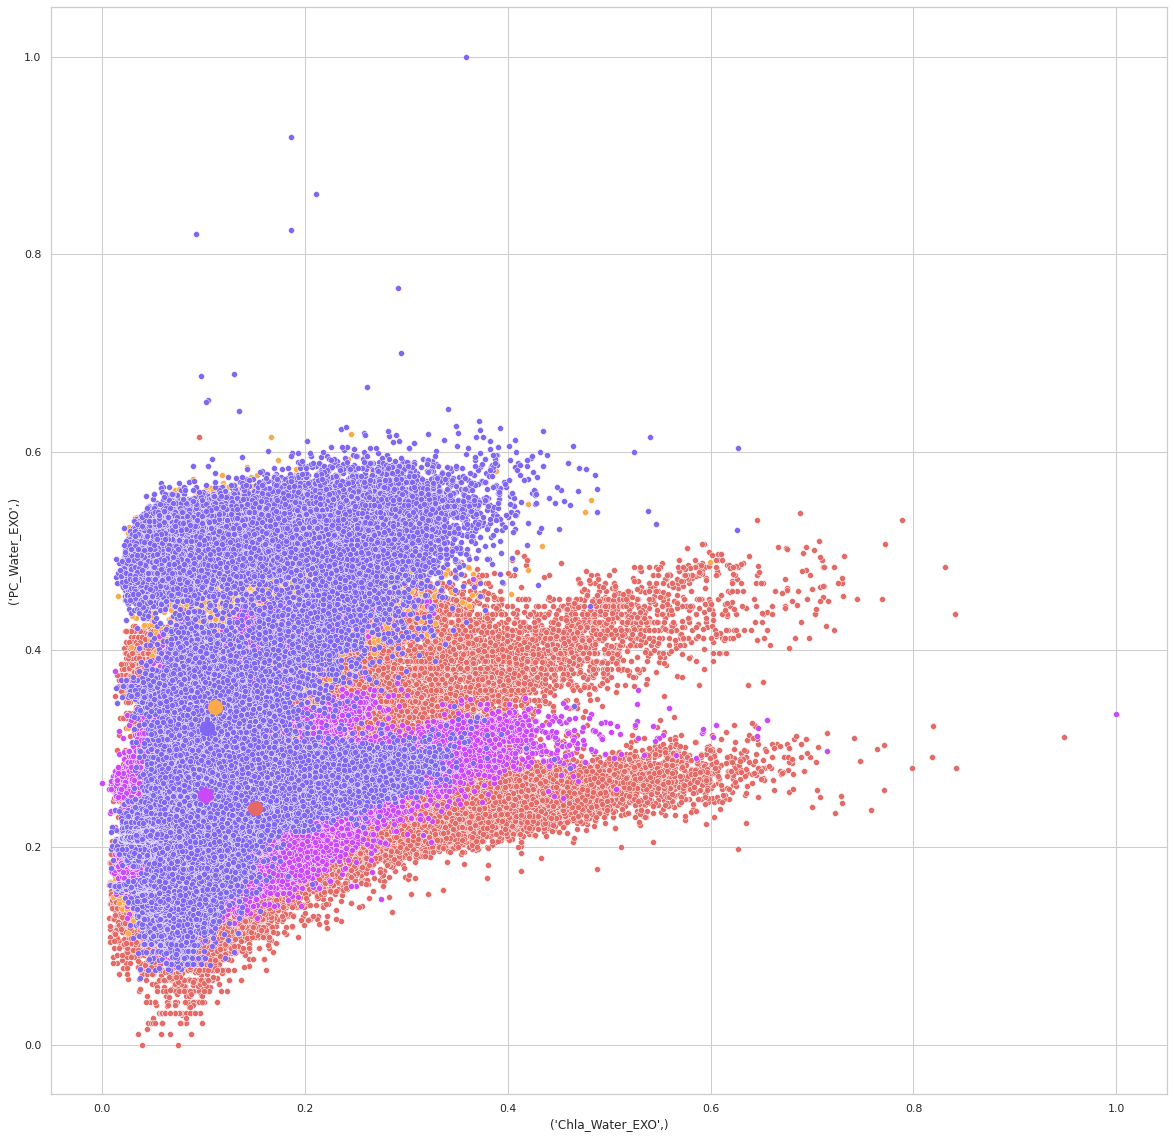

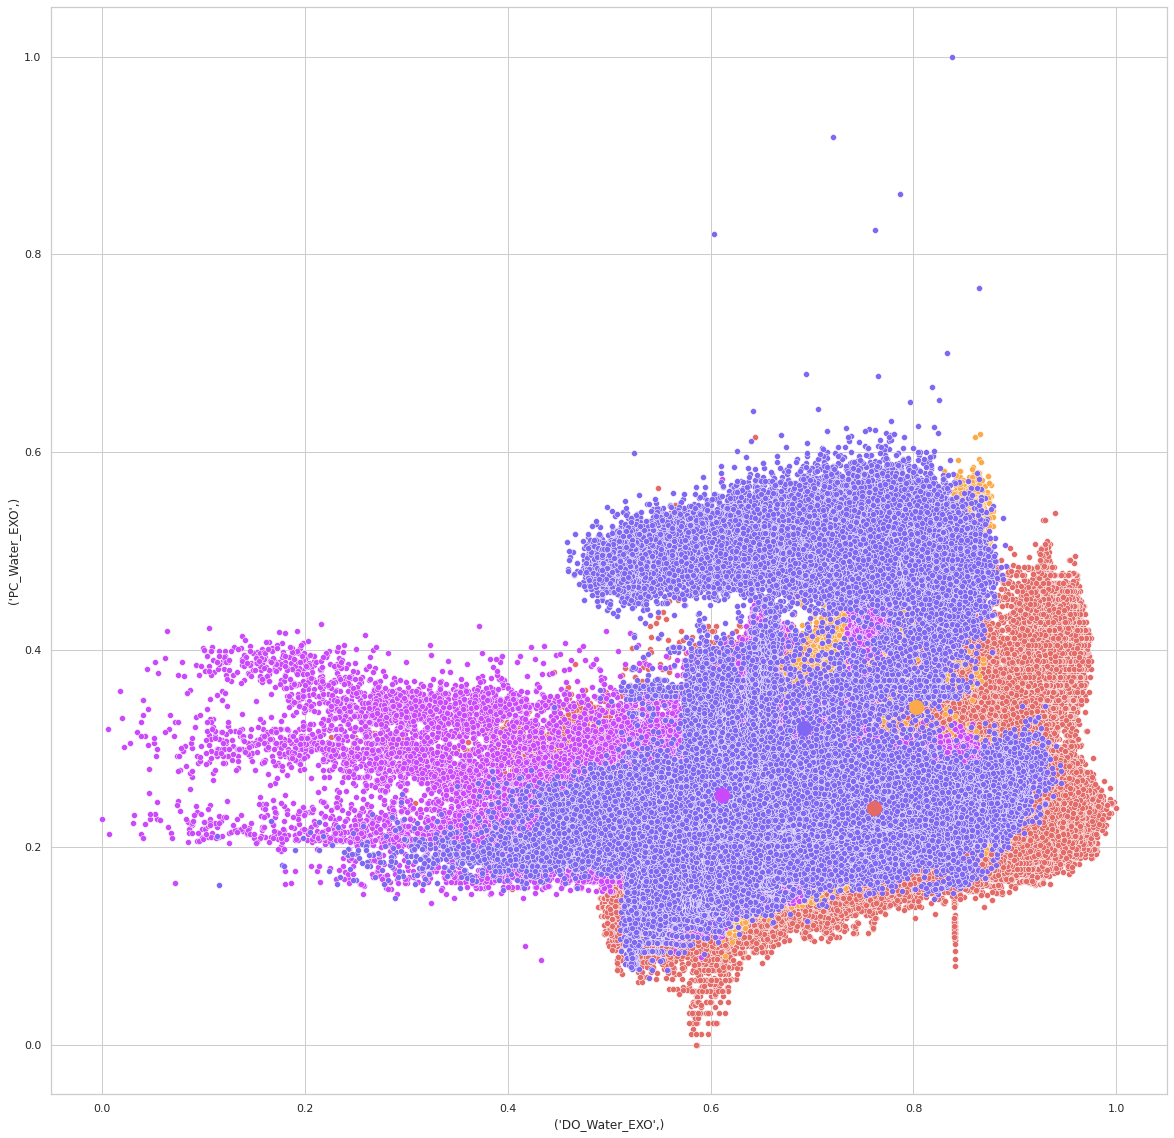

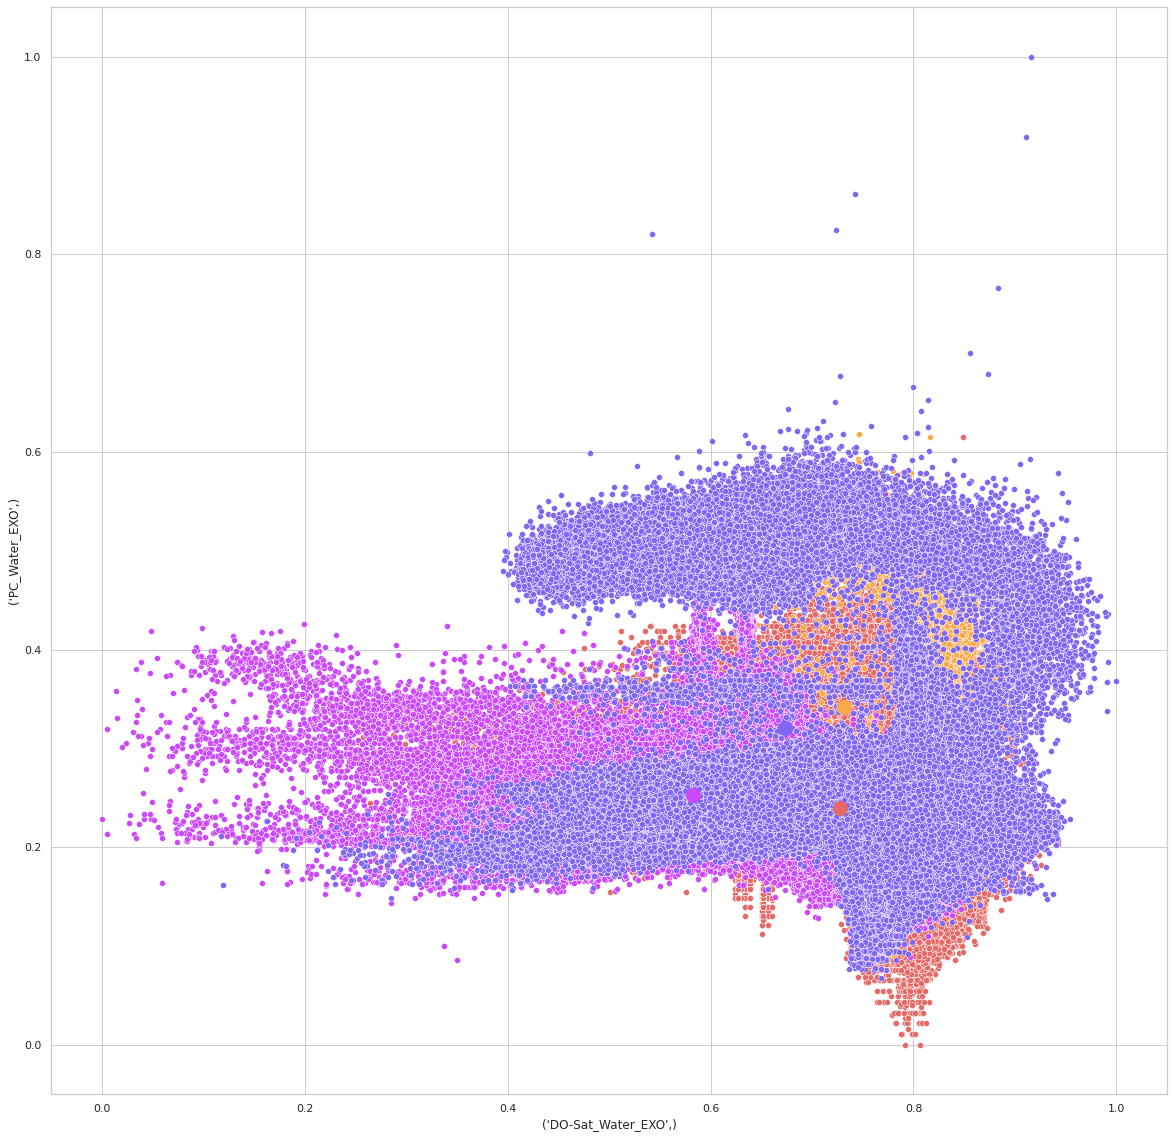

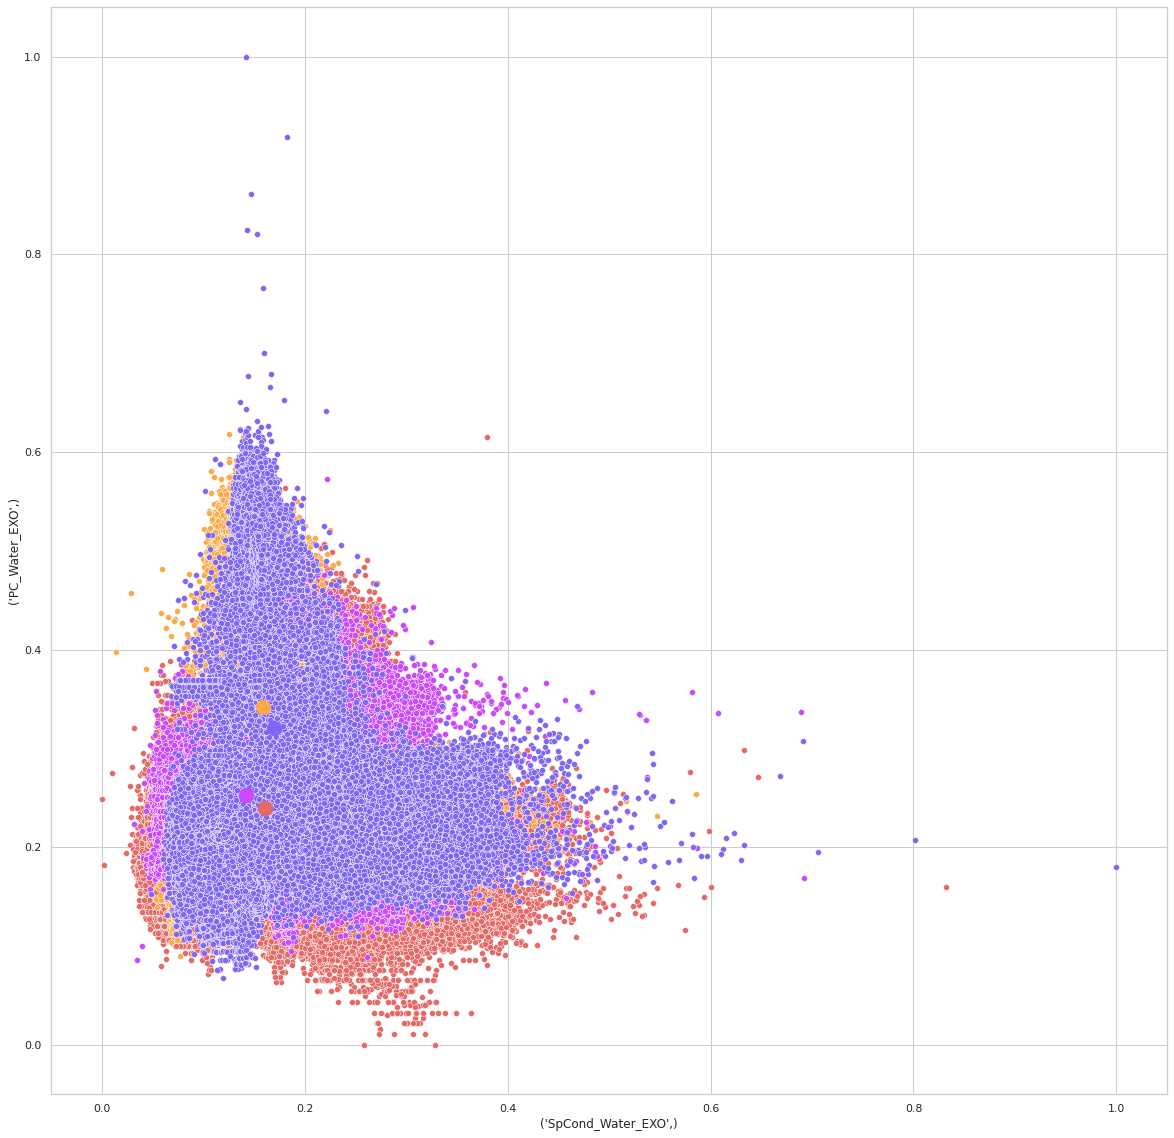

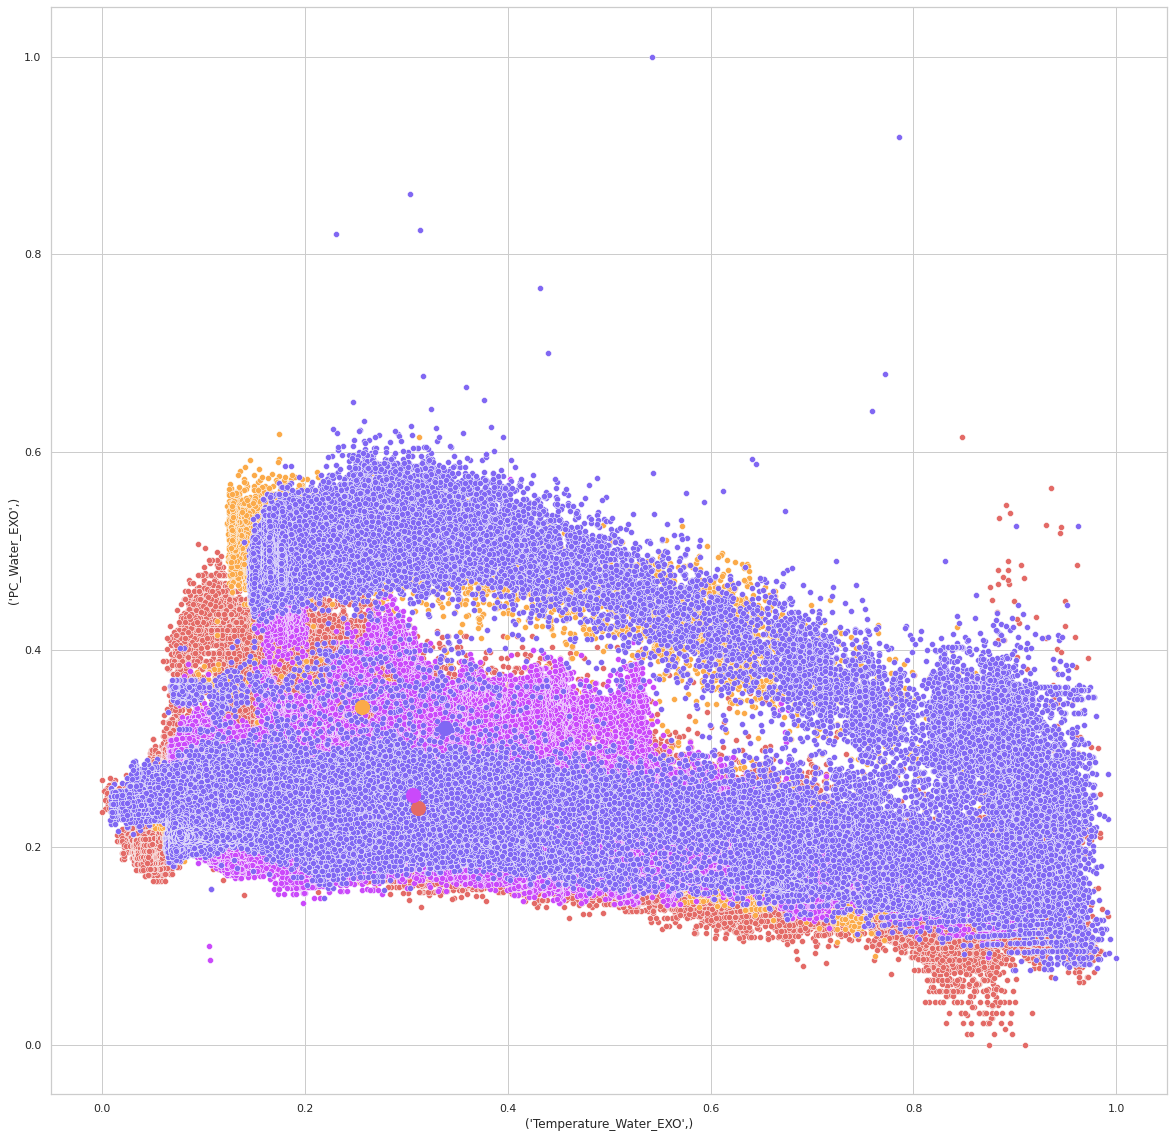

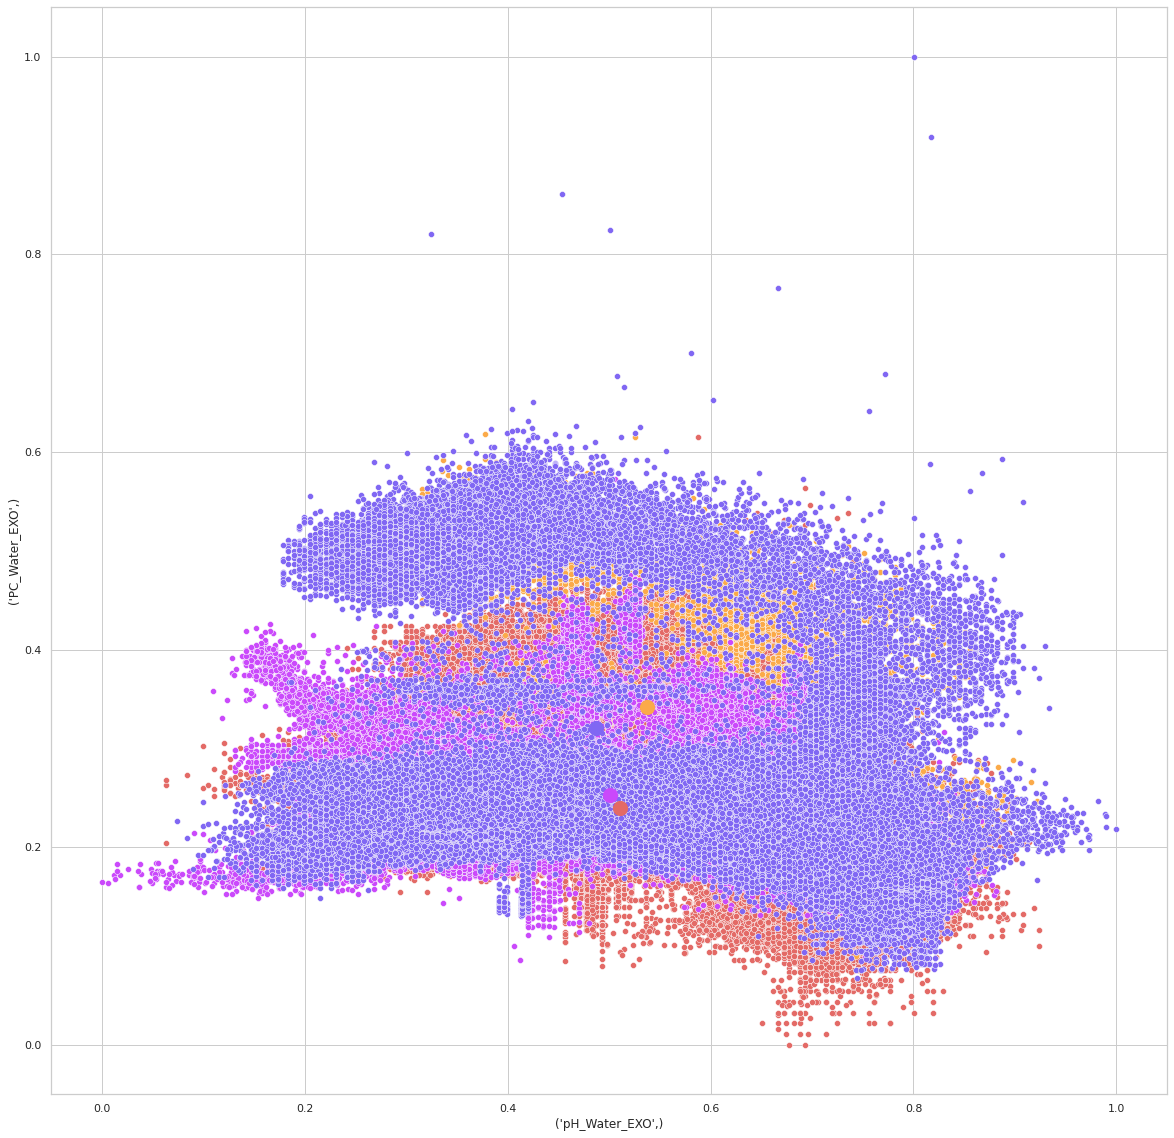

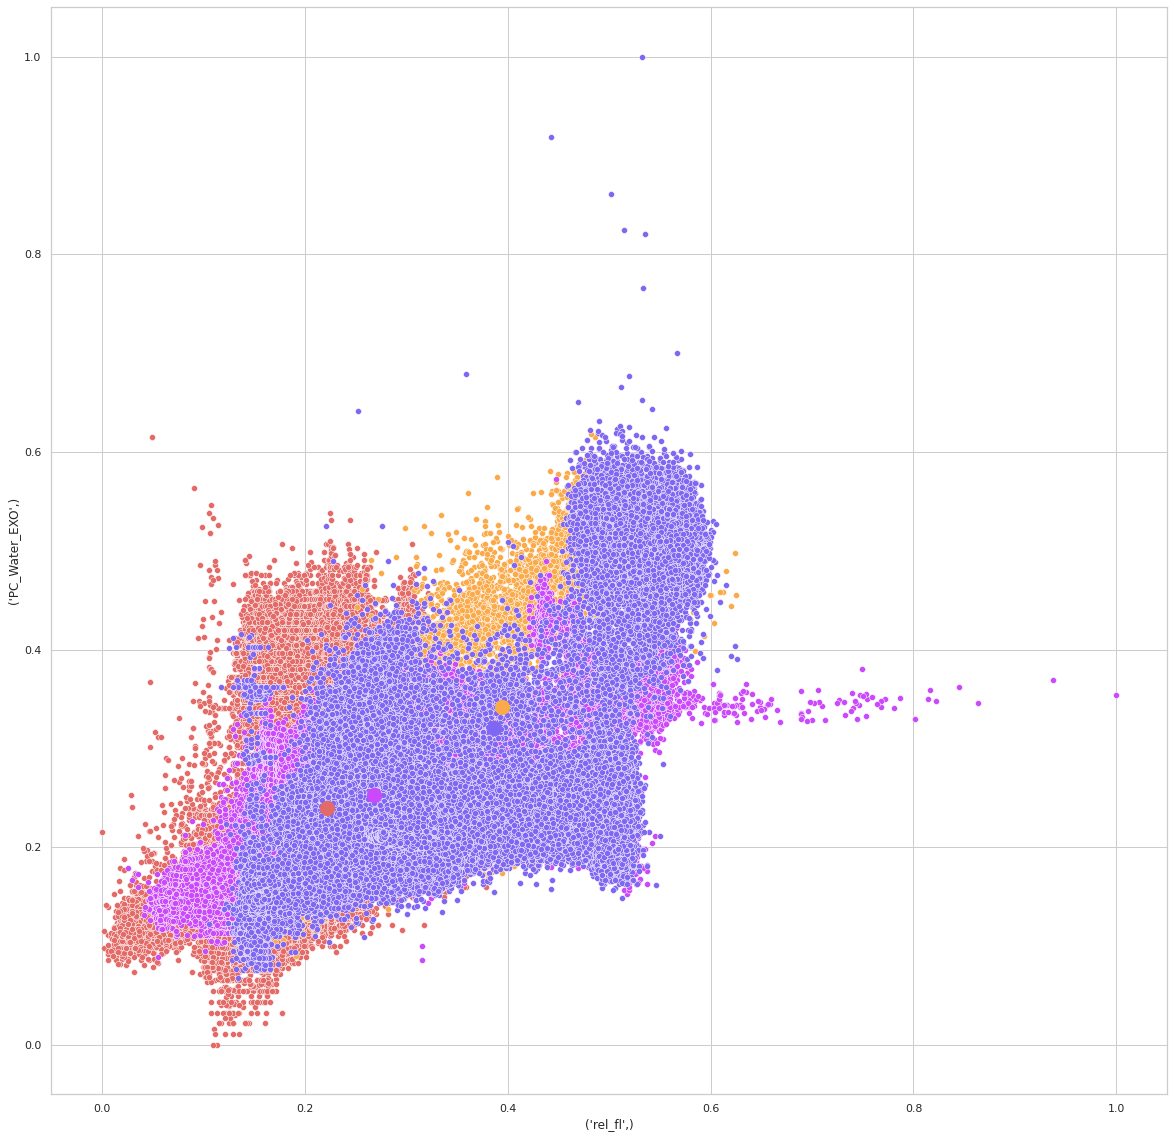

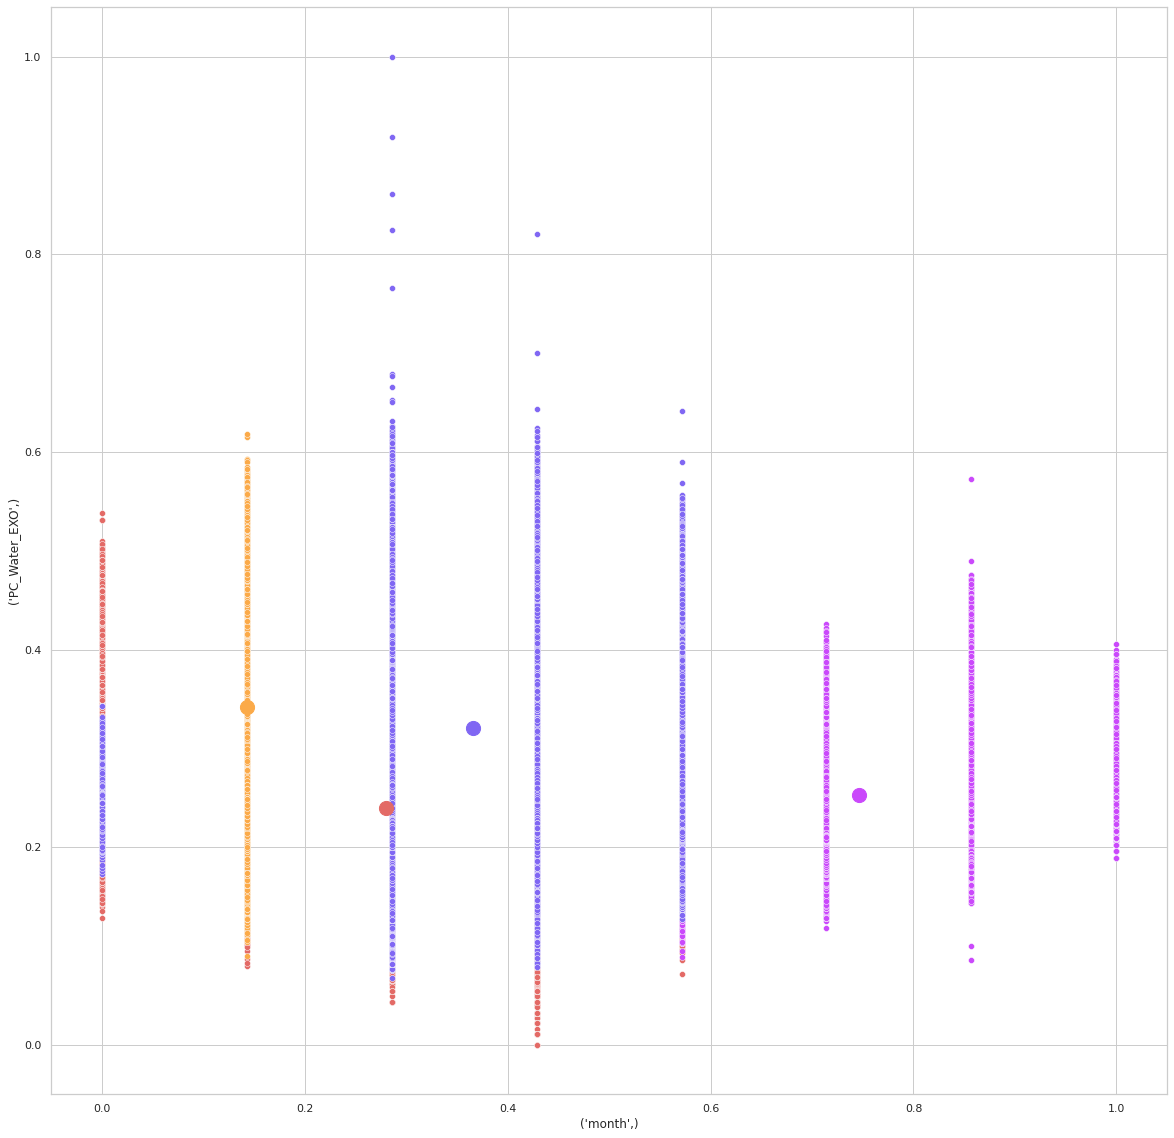

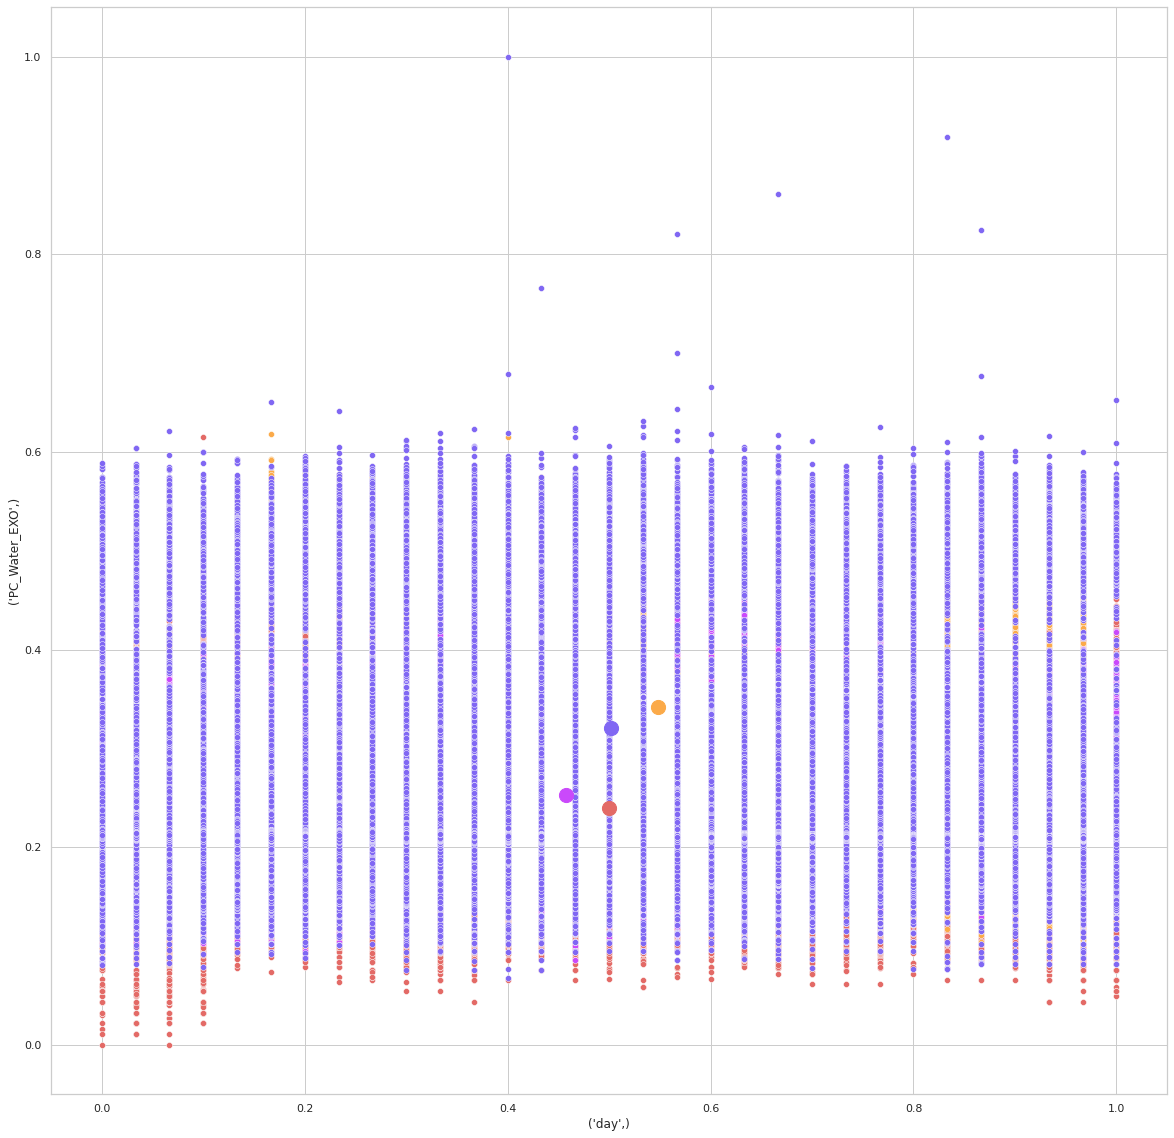

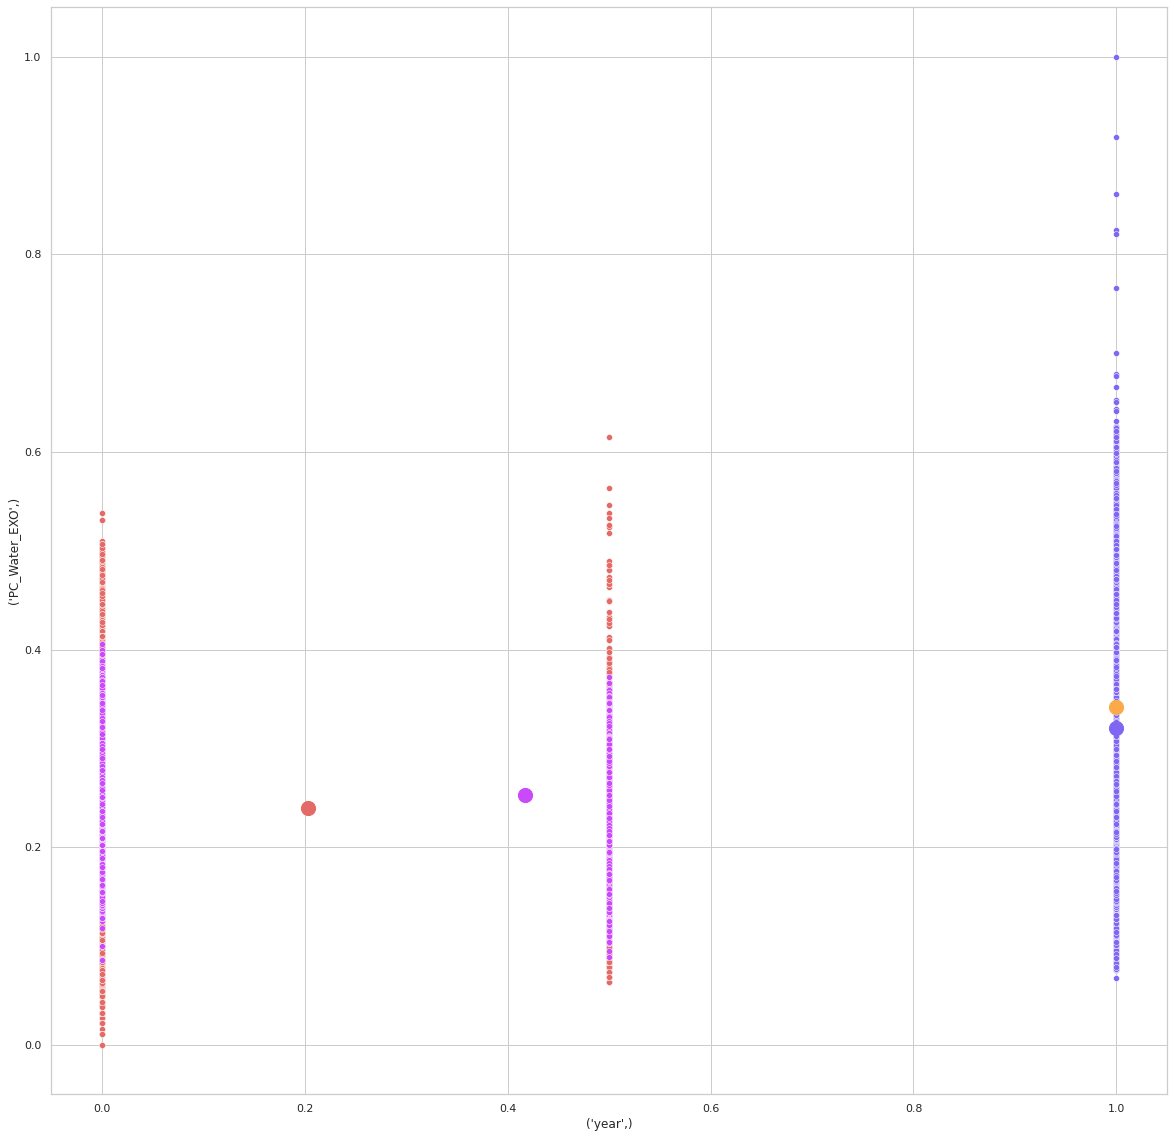

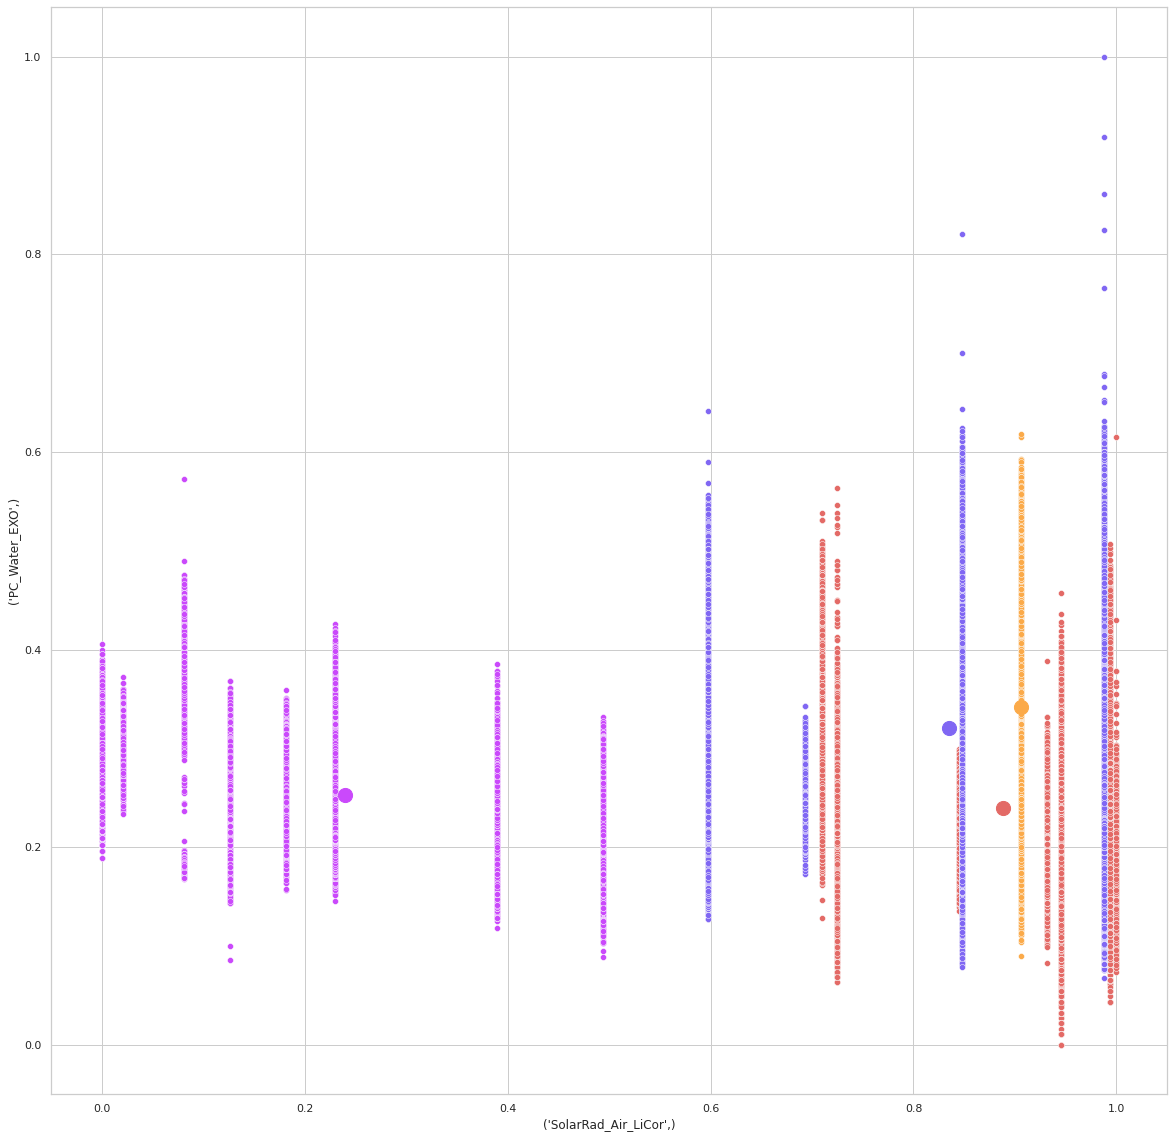

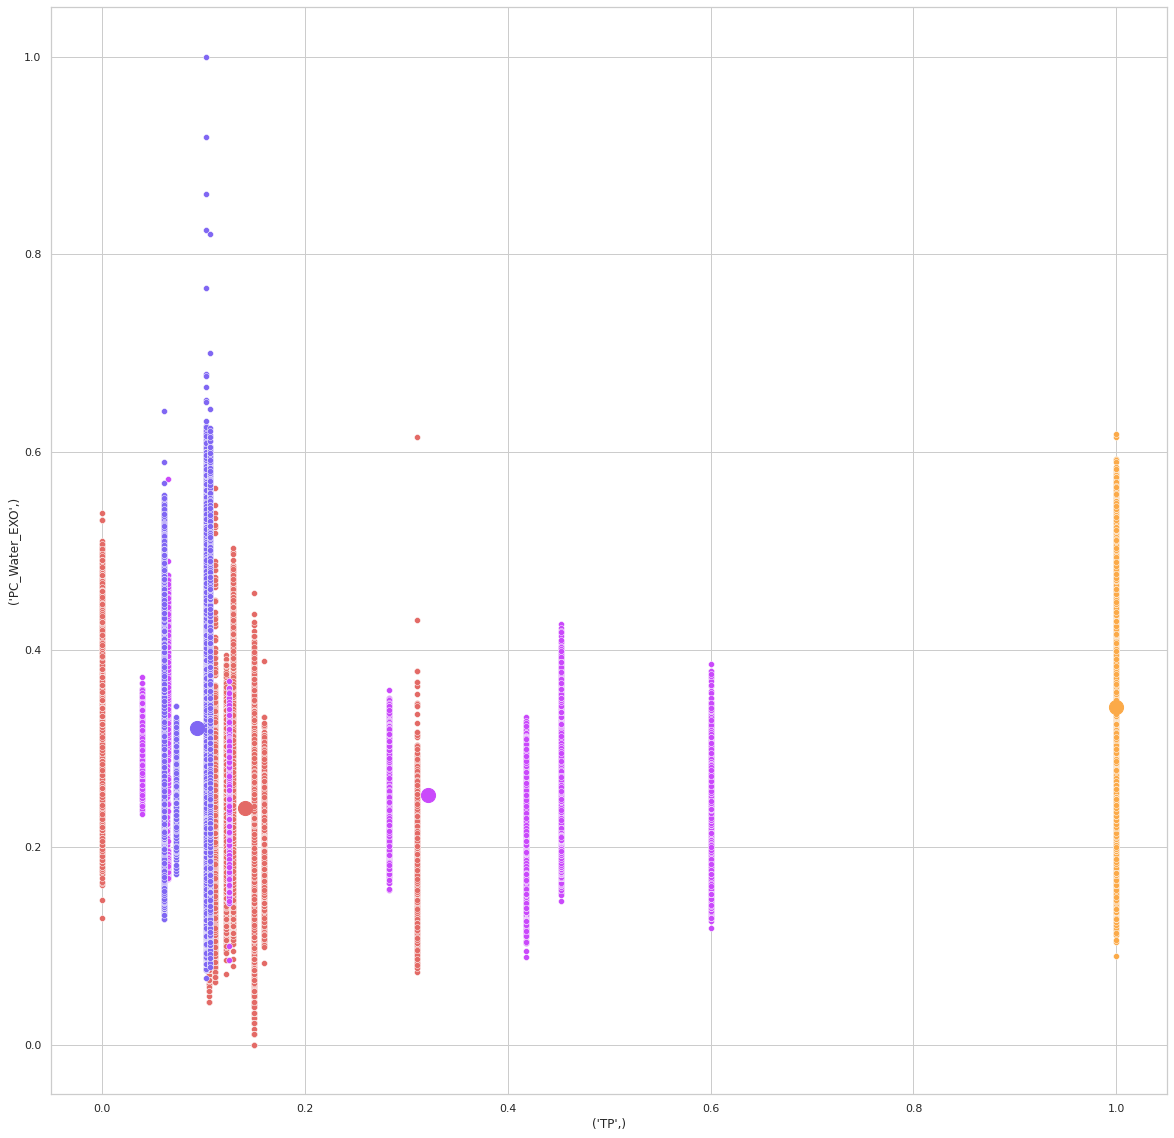

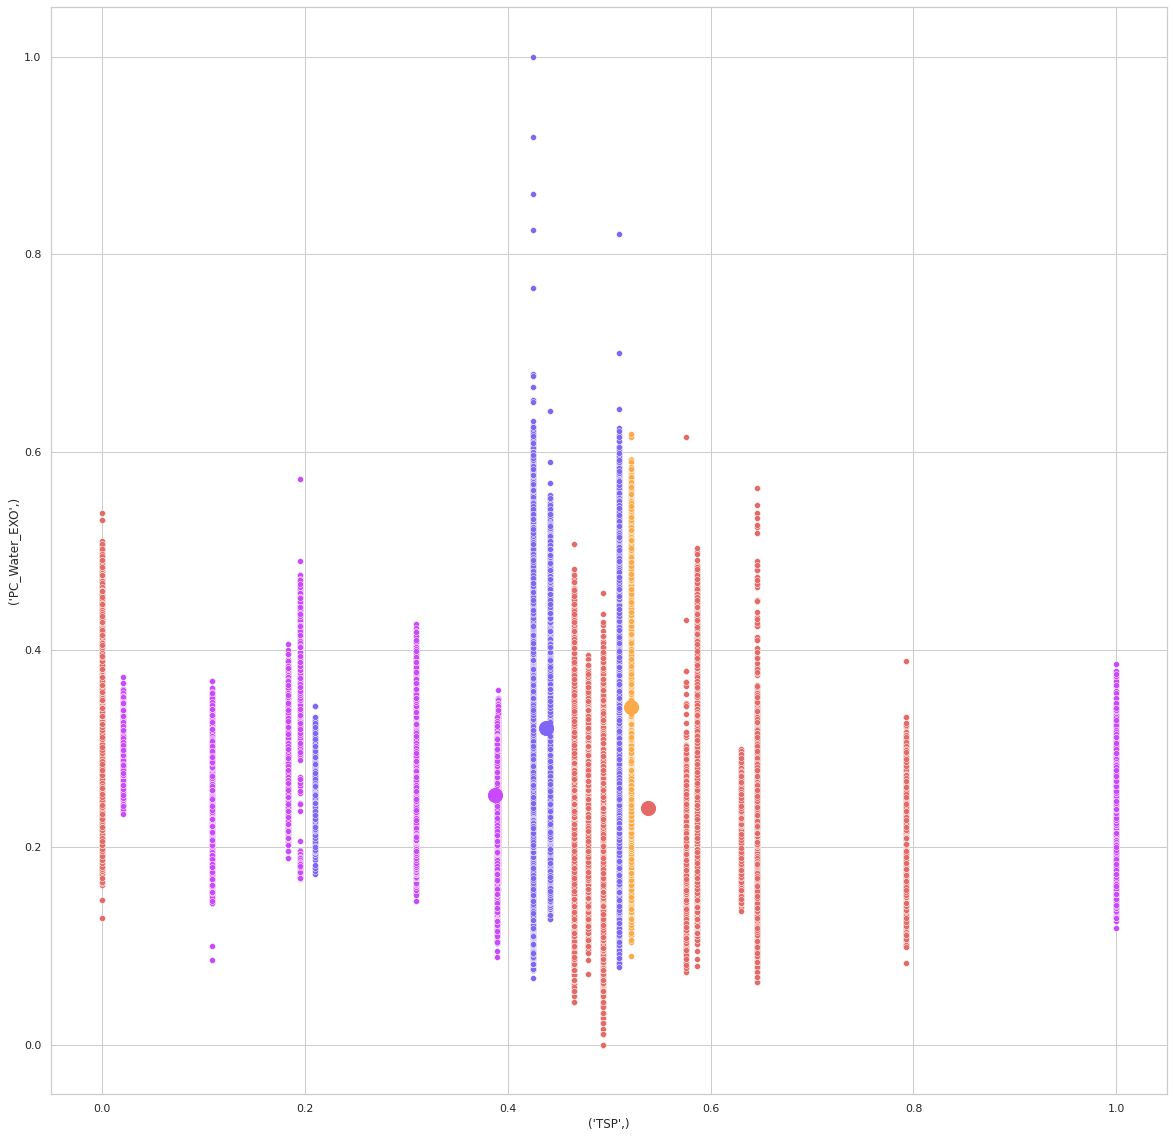

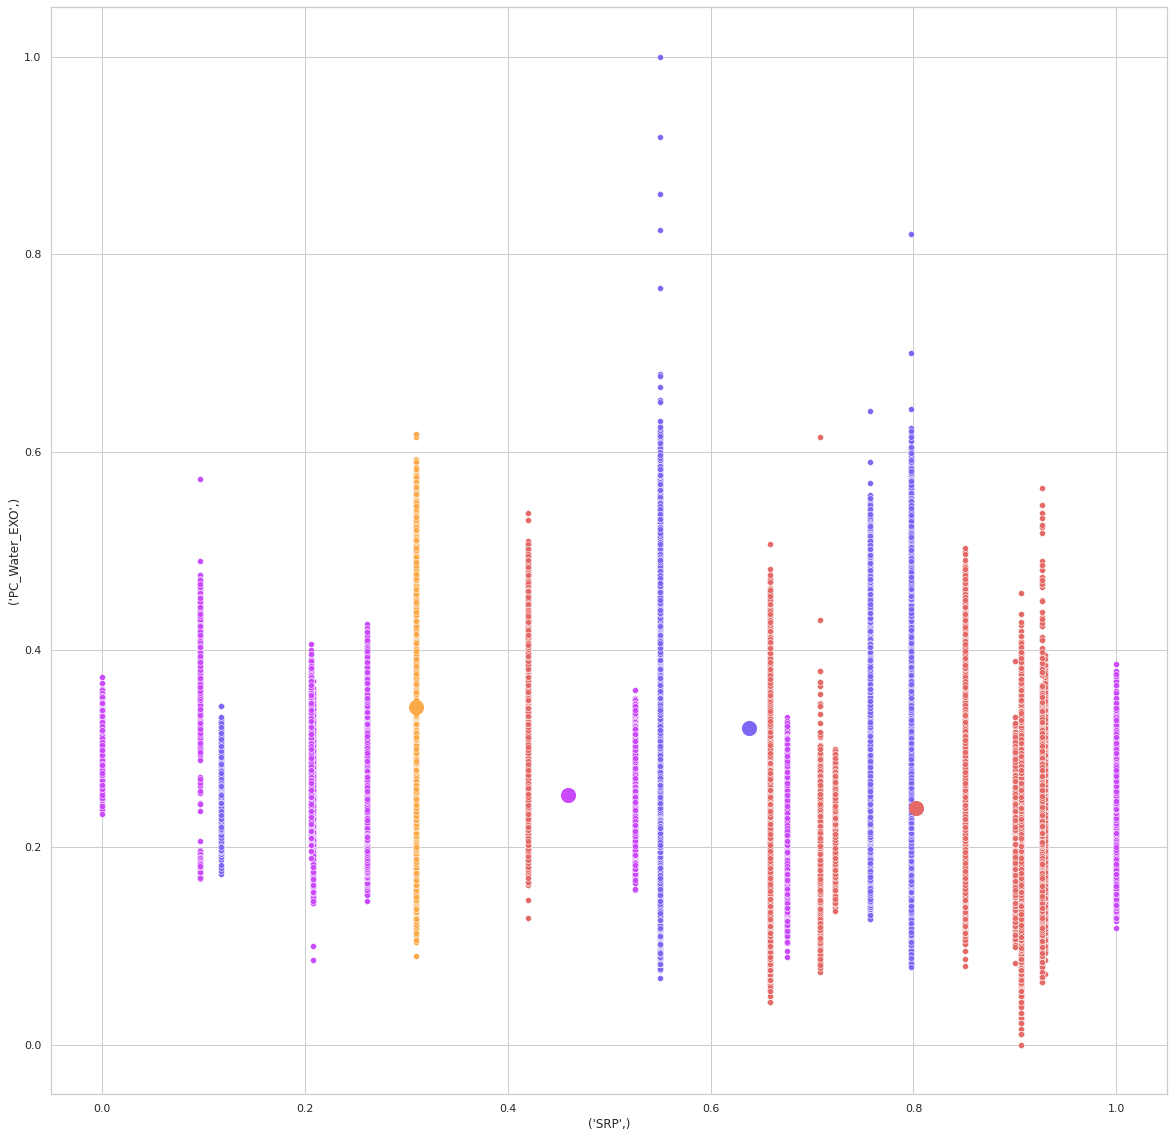

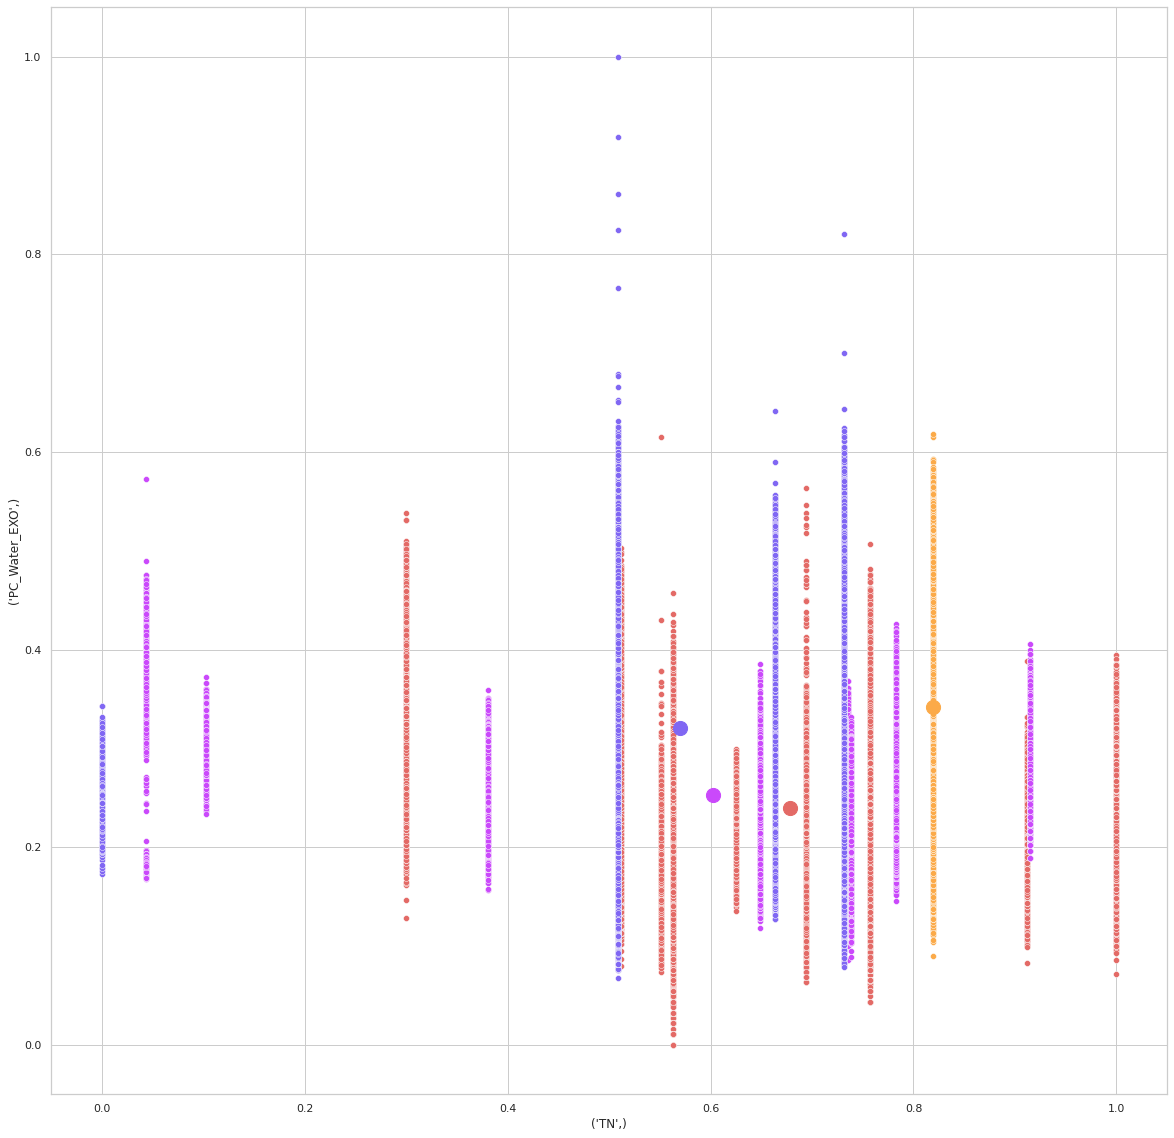

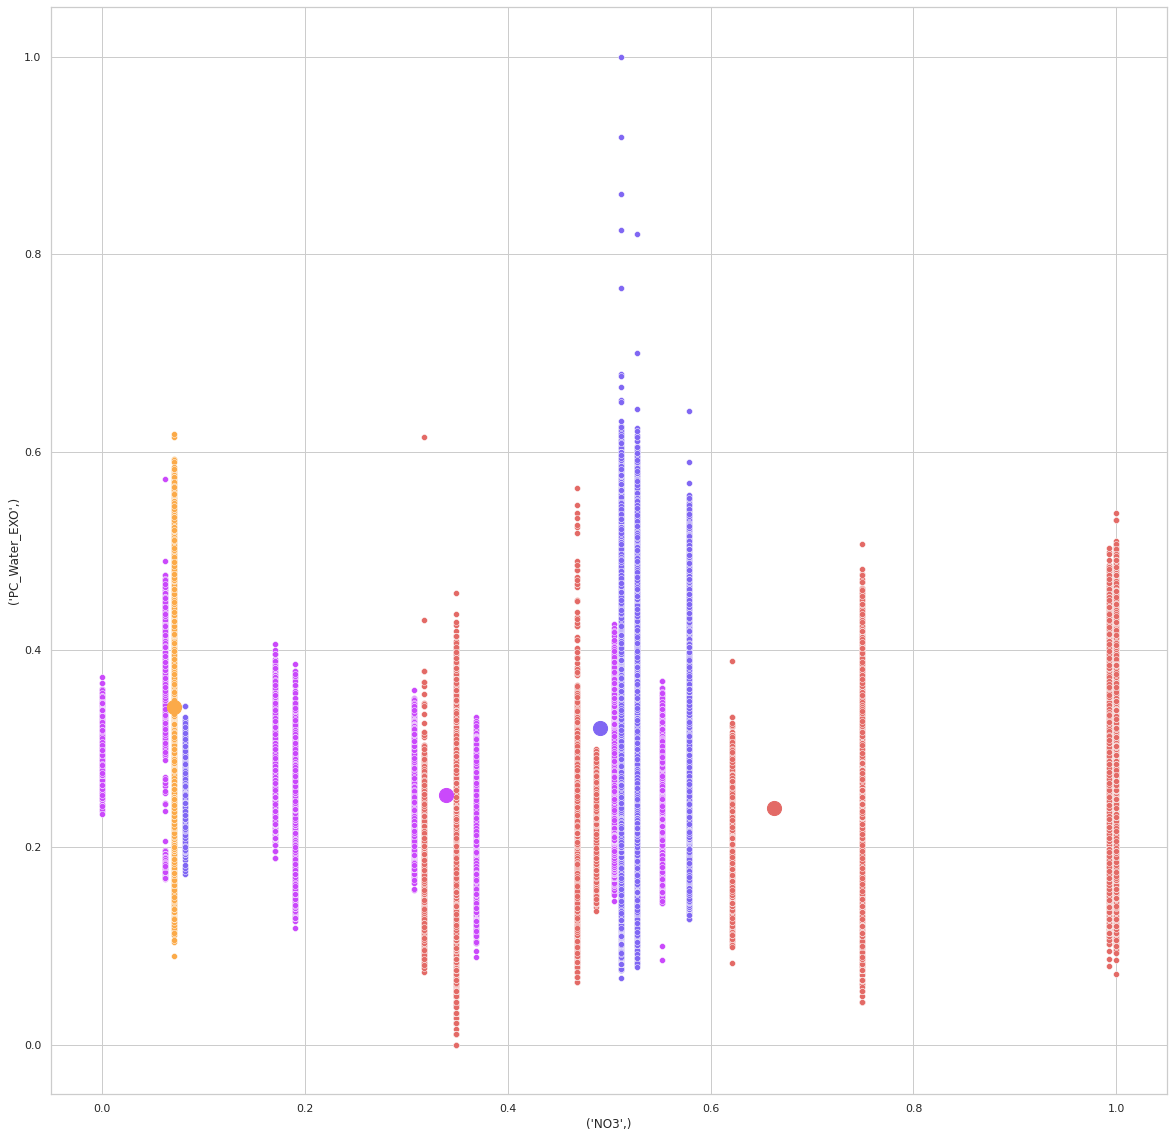

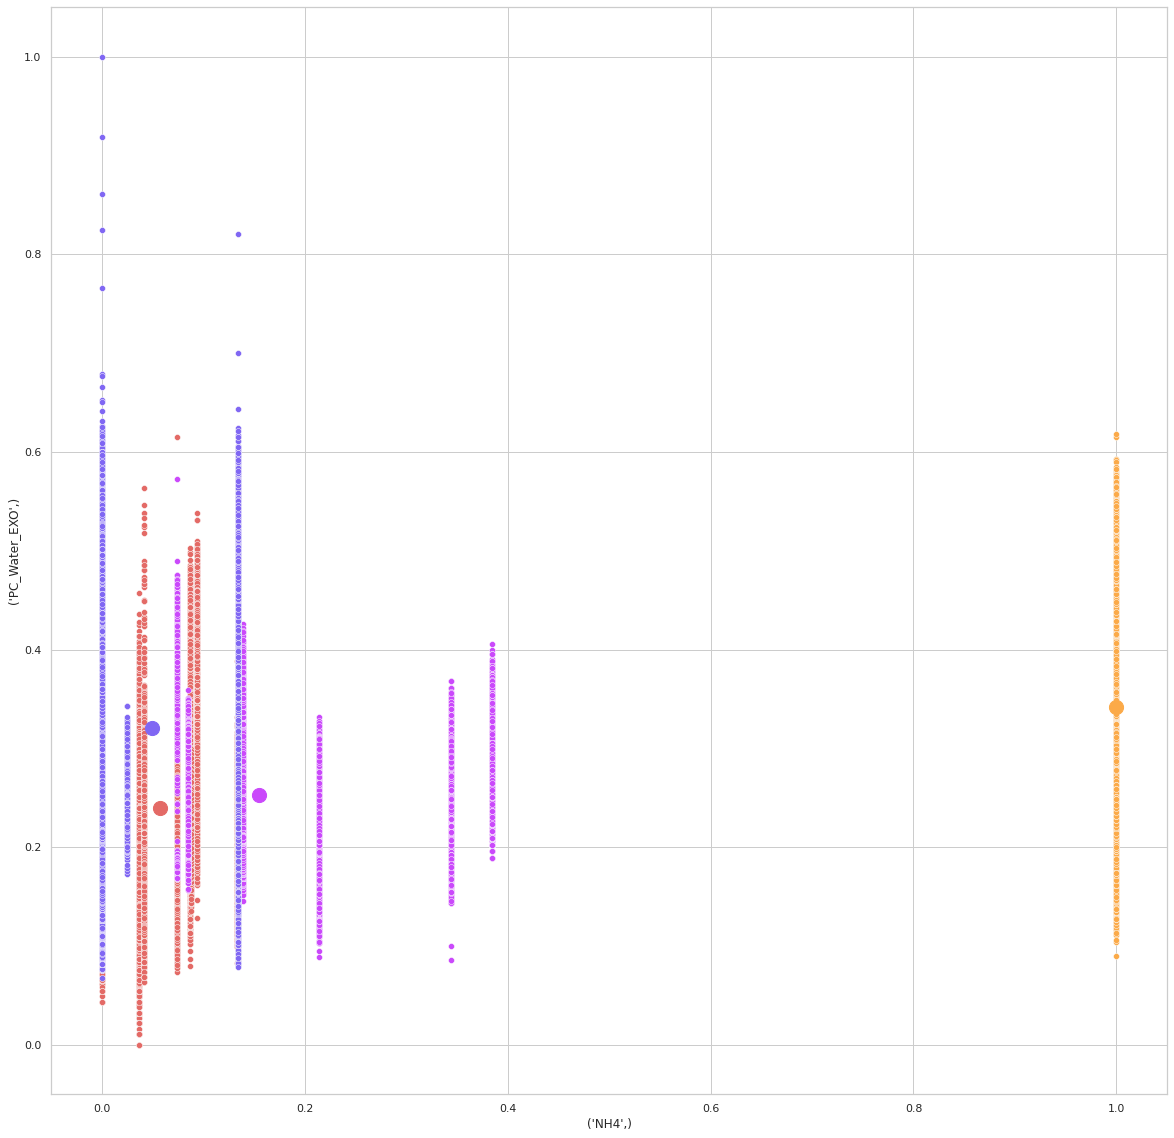

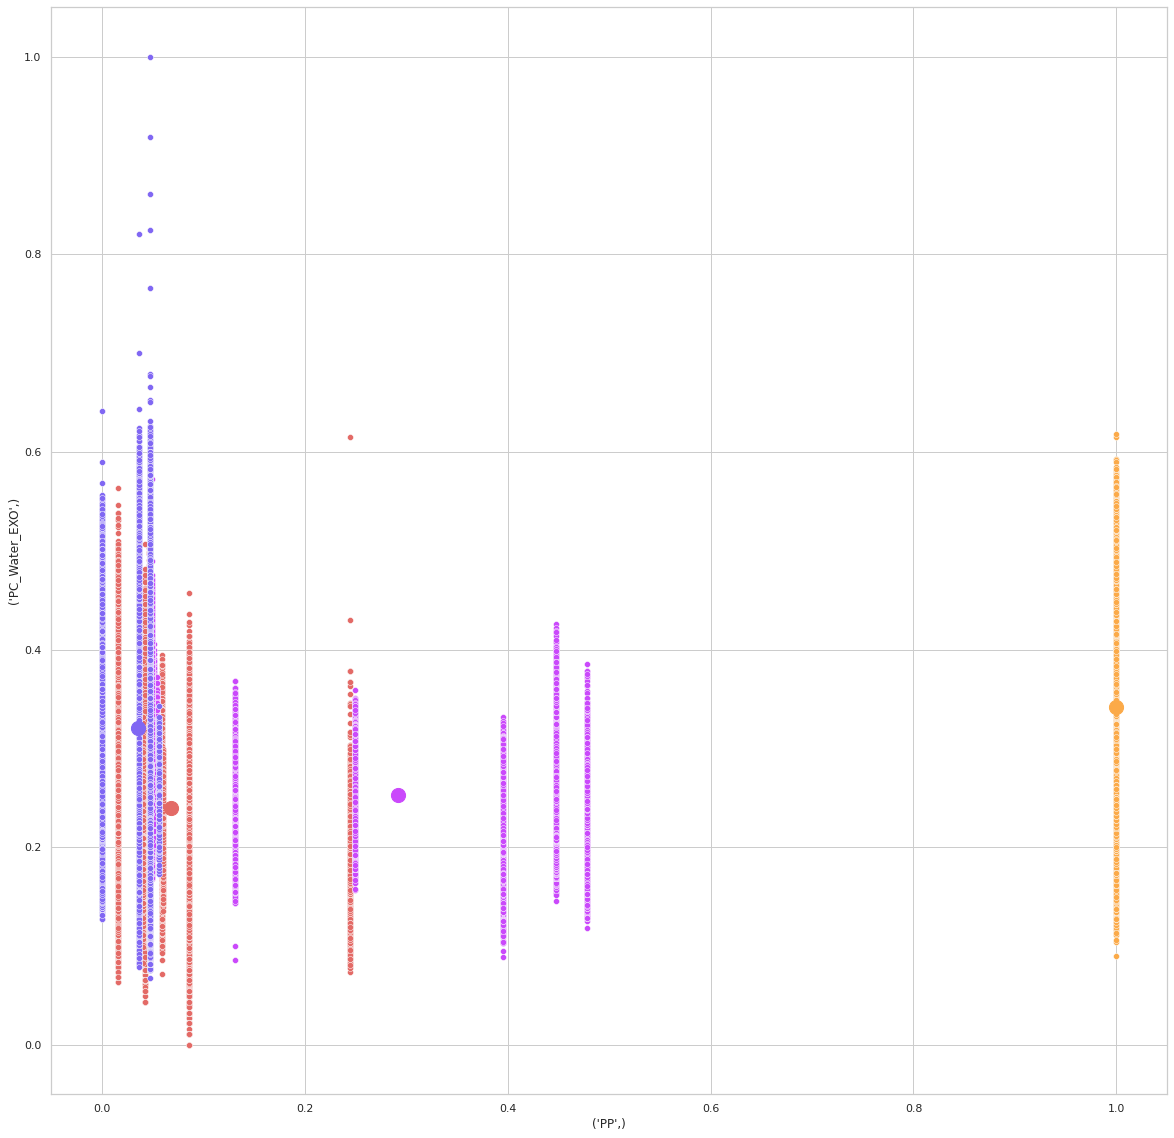

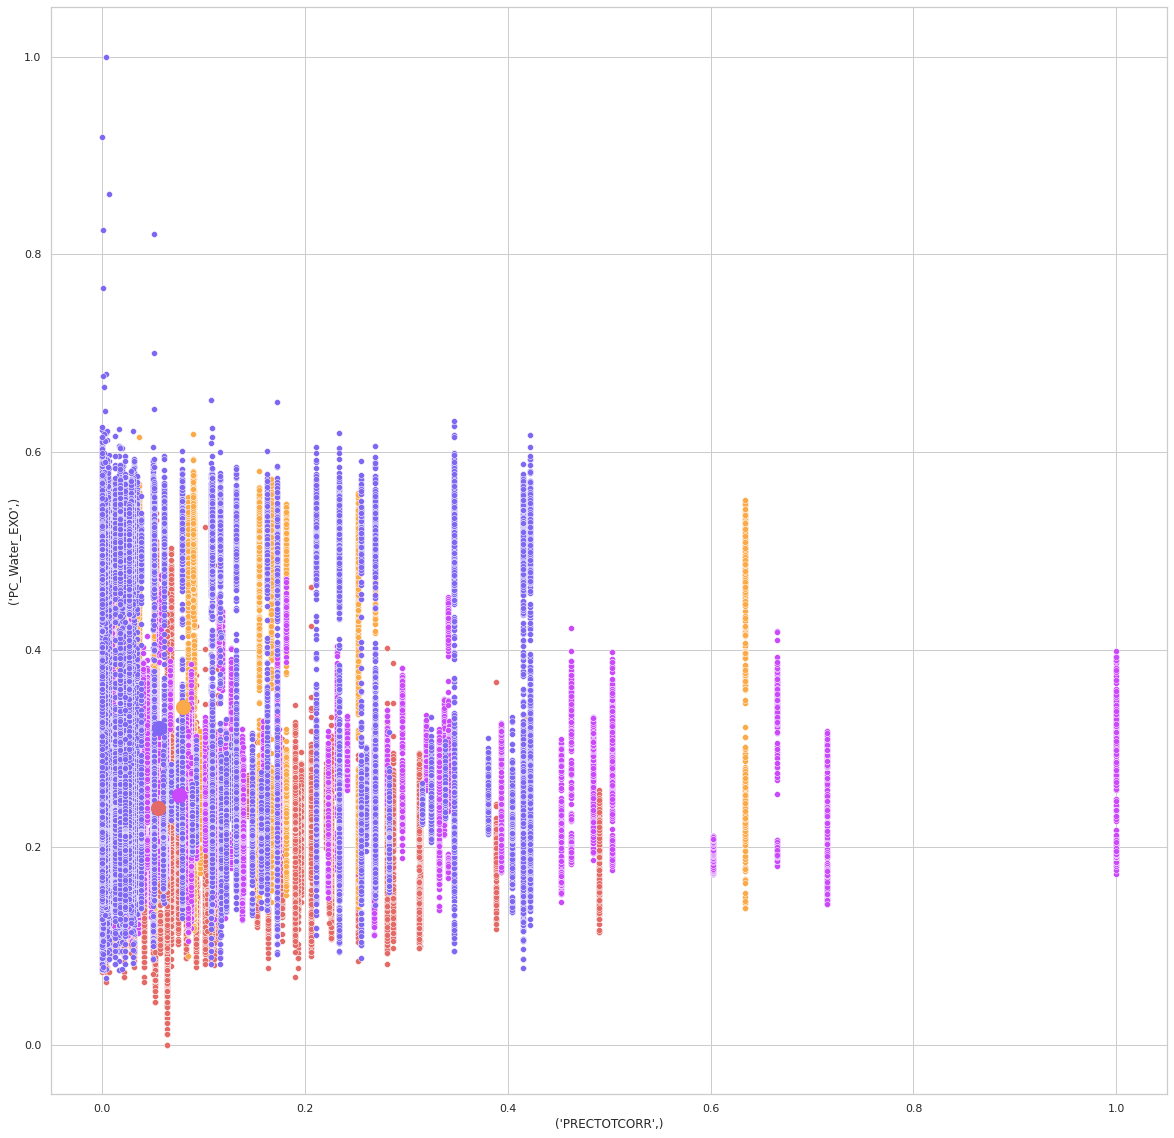

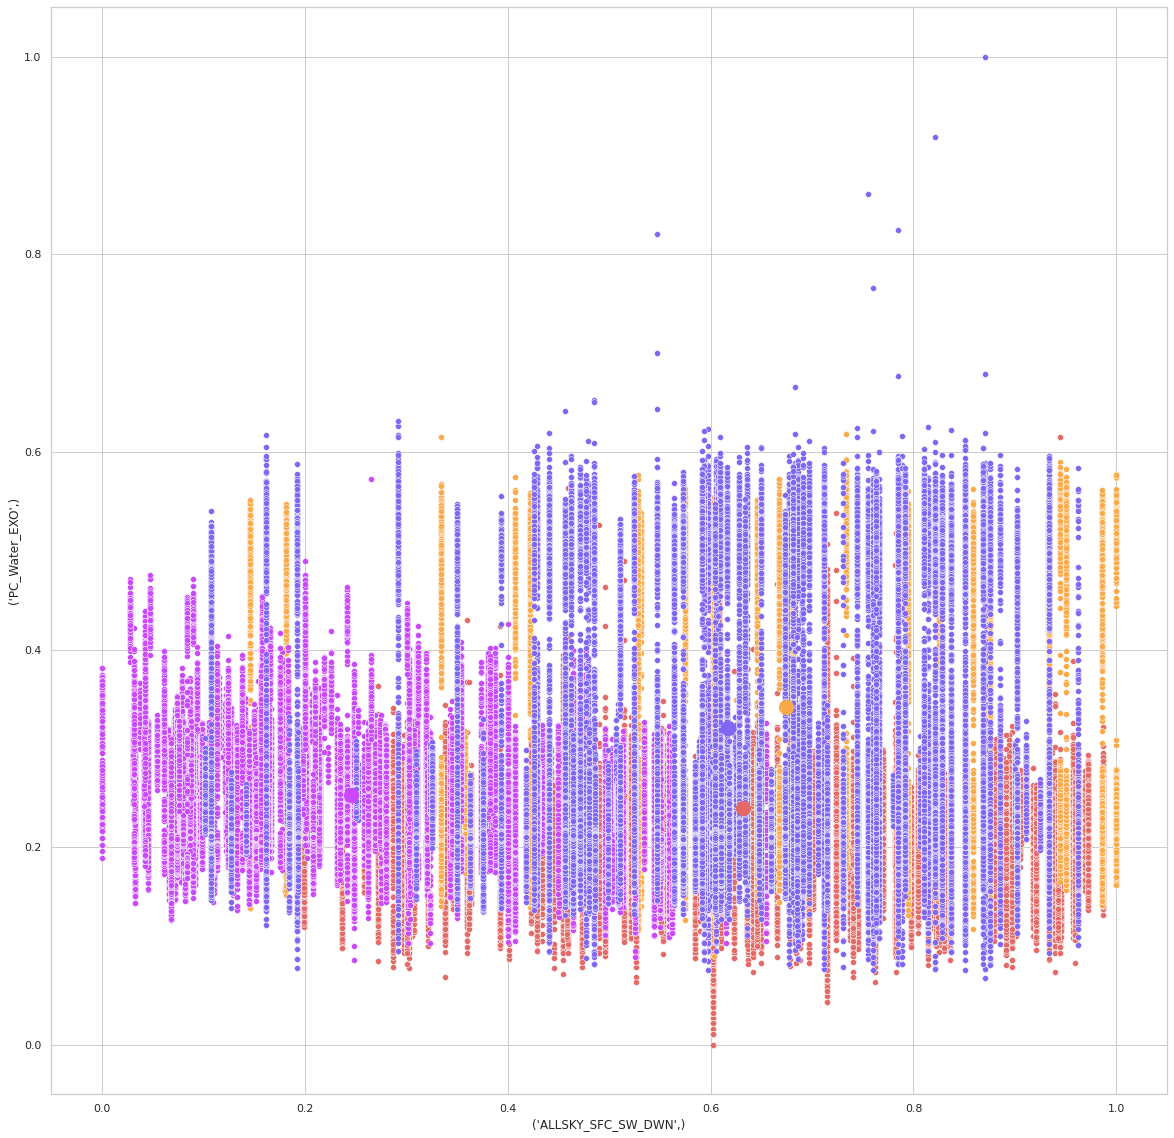

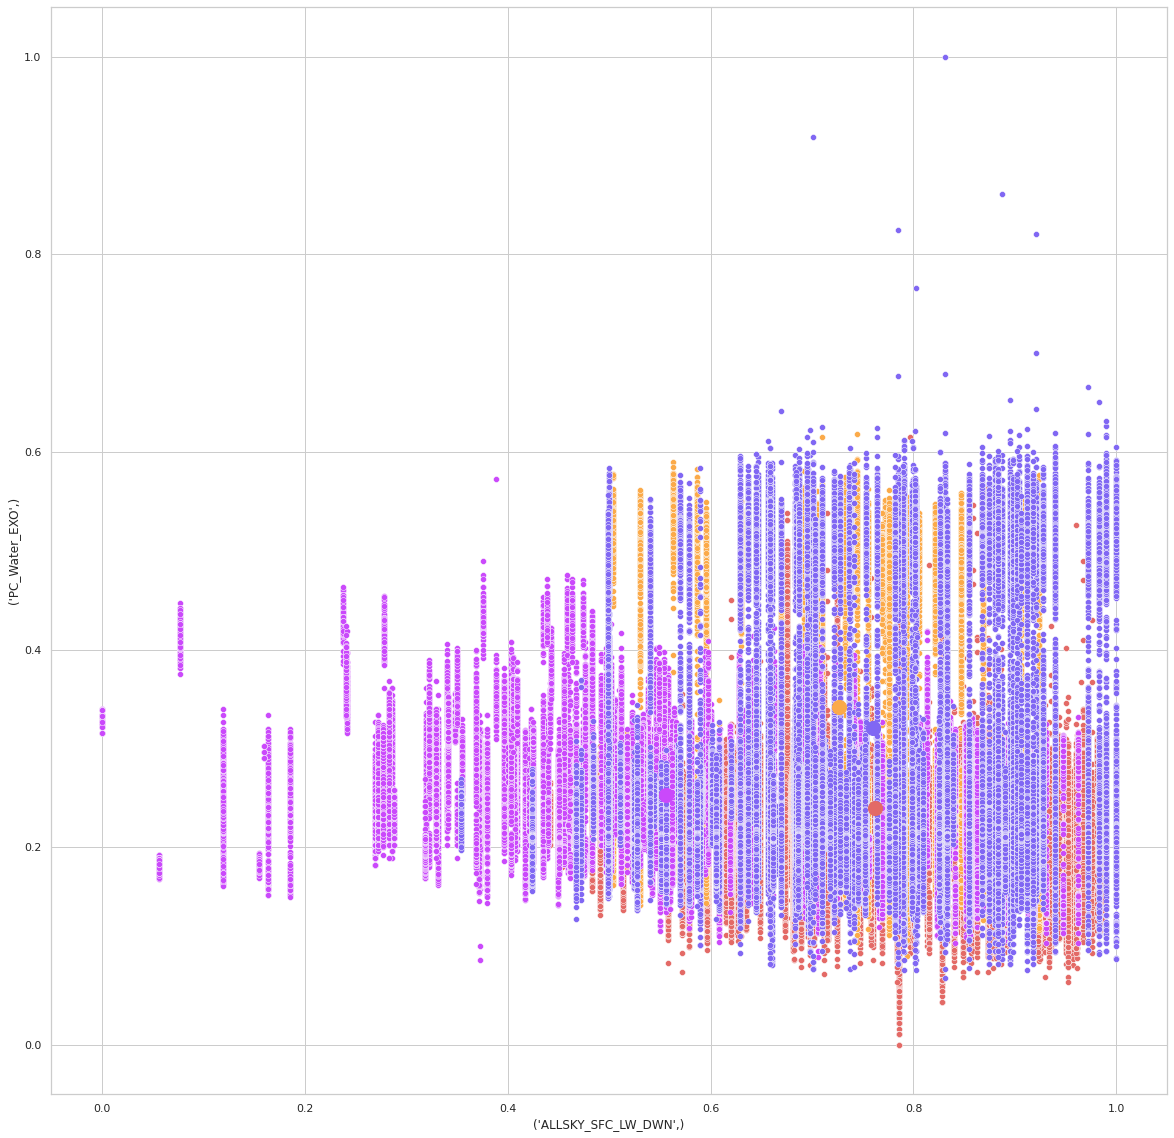

In [38]:
colors = ['#E36A66', '#FBAA49', '#CA49FB', '#8067F3']
for i in range(len(cols)):
       if i==1:
              continue
       plt.figure(figsize=(20, 20))
       for k in range(4):
              sns.scatterplot(x=X[kmeans.labels_==k].iloc[:,i], y=X[kmeans.labels_==k].iloc[:,1], color=colors[k])
       for k in range(4):
              plt.scatter(kmeans.cluster_centers_[k,i], kmeans.cluster_centers_[k,1], s=200, c=colors[k])
       plt.show()